# Agenda

1. Jupyter basics
2. NumPy
    - NumPy arrays
    - Data types (dtypes)
    - Operations, including broadcasting
    - Boolean/mask arrays
    - Sorting and retrieving data
    - 2D data (a little)
3. Pandas
    - Series and DataFrame (the two main Pandas data structures)
    - Setting and retrieving data
    - How are these different from NumPy data structures?
    - Indexes and columns
4. Grouping and sorting
5. Joining multiple data frames together
6. Memory usage and optimization of Pandas
7. Working with strings
8. Working with dates and times
9. Visualization of our data

# Jupyter

Jupyter is the latest evolution of IPython, a command-line replacement for the standard `python` interactive shell. It gives you the illusion that Python is running in your browser, and lets you run code in it. Really, though, there's a backend Python process that is running all of the code.

Jupyter handles code, but it also handles documentation in Markdown format (like I'm writing here), which lets us write HTML-formatted text easily.

The biggest thing to know about Jupyter is that it's based on *cells*. Right now, I'm typing into a cell. When you type into a cell, one of two things can happen, depending on the mode:

- In *edit mode*, which I'm in now, typing adds text to the current cell. You can enter edit mode by clicking in the cell or by pressing ENTER. This is how we add code and/or documentation.
- In *command mode*, anything we type (typically one-letter commands) is sent to Jupyter to give it instructions. You can enter command mode by clicking to the left of the cell or by pressing ESC.

We can *always* press shift+ENTER to execute the current cell, which means either running the Python code in it or turning the Markdown into nice looking HTML.

What commands do we have in command mode?
- `c` -- copies the current cell
- `x` -- cuts the current cell
- `v` -- pastes the most recent cut/copy
- `a` -- add a new, blank cell *above* the current one
- `b` -- add a new, blank cell *below* the current one
- `y` -- turn the current cell into a Python coding cell
- `m` -- turn the current cell into a Markdown documentation cell

# Preview of what we can do in Jupyter with Pandas



In [8]:
import pandas as pd

filename = '/Users/reuven/Downloads/public_emdat_2024-11-11.xlsx'

df = pd.read_excel(filename)

<Axes: xlabel='Start Year'>

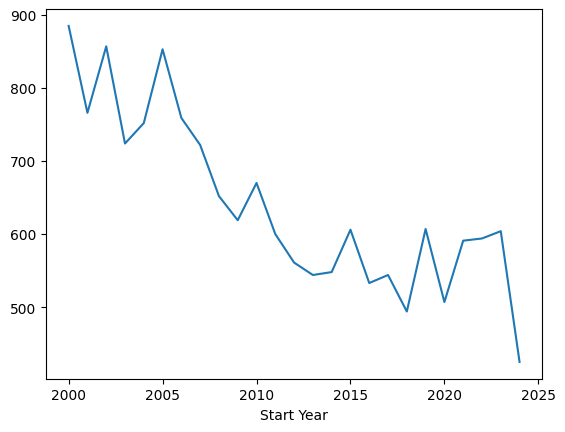

In [11]:
(
    df
    .groupby('Start Year')['DisNo.'].count()
    .plot.line()
)

# NumPy

Python is the #1 language for data science and machine learning. This makes no sense!

The answer is NumPy, which stores data in C (i.e., very small and fast) but gives us a thin layer of Python compatibility. In this way, we can remain in Python but get the advantages of C.

Using NumPy means *not* using (mostly) Python's builtin data types -- ints, floats, strings, lists, dicts, etc. Instead, we're going to use a single data structure, a NumPy array. Its data will reflect the fact that it's stored in C, using C types.

The only data structure we'll use is NumPy's `ndarray`, which stands for "n-dimensional array." 

If we want to load NumPy, we can, using the standard phrasing:

    import numpy as np

*EVERYONE* in the NumPy world uses this alias. 

We can use `np.ndarray` to create a new NumPy n-dimensional array -- but don't do this! Instead, you'll want to use `np.array`, which creates a new array in a (much) simpler way.

In [12]:
import numpy as np

a = np.array([10, 20, 30, 40, 50])   # use a Python list of ints to create a NumPy array

In [13]:
type(a)   # what kind of data do I have here?

numpy.ndarray

In [14]:
# What standard Python things can I do with my array?

a[0]  # get the first item

np.int64(10)

In [15]:
a[1]

np.int64(20)

In [16]:
a[-1]  # can I get the final value?

np.int64(50)

In [17]:
a[3] = 12345
a

array([   10,    20,    30, 12345,    50])

In [18]:
a[3]

np.int64(12345)

In [19]:
# what if I say

a[3] = 'hello'

ValueError: invalid literal for int() with base 10: 'hello'

In [22]:
# can we use a slice?

a[2:4]    # from 2 until (not including) 4

array([   30, 12345])

In [24]:
# fancy indexing -- retrieve more than one value from our array
# we provide a list of indexes, rather than a single index
a[3]

np.int64(12345)

In [25]:
a[1]

np.int64(20)

In [26]:
a[   [3, 1]   ]   # this is fancy indexing -- we want an array back whose first value is from index 3, and second from index 1

array([12345,    20])

In [27]:
a[  [3, 1, 3, 1, 2] ]

array([12345,    20, 12345,    20,    30])

In [28]:
# methods we can run on our array -- aggregation methods, meaning that we get a single value back from the array

a.sum()

np.int64(12455)

In [30]:
a.min()

np.int64(10)

In [31]:
a.max()

np.int64(12345)

In [32]:
a.mean()

np.float64(2491.0)

In [33]:
a.std()

np.float64(4927.017759253563)

In [37]:
a.size    #not a method, how many values are there in this array?

5

In [38]:
# what happens if we add two Python lists?

mylist = [10, 20, 30, 40, 50]
mylist + mylist

[10, 20, 30, 40, 50, 10, 20, 30, 40, 50]

In [39]:
# what happens if I add an integer to my list?

mylist + 94

TypeError: can only concatenate list (not "int") to list

In [40]:
# but a NumPy array is very different...

a + a

array([   20,    40,    60, 24690,   100])

In [41]:
a

array([   10,    20,    30, 12345,    50])

In [43]:
# also, what if I try to add an integer?

a + 4  # this is known as "broadcasting," where the operation is run on each element of the array

array([   14,    24,    34, 12349,    54])

In [45]:
a + 10

array([   20,    30,    40, 12355,    60])

In [46]:
a - 10

array([    0,    10,    20, 12335,    40])

In [47]:
a * 10

array([   100,    200,    300, 123450,    500])

In [48]:
a / 10   # truediv in Python, giving us a float result

array([1.0000e+00, 2.0000e+00, 3.0000e+00, 1.2345e+03, 5.0000e+00])

In [49]:
a // 10   # floordiv, giving us an int result

array([   1,    2,    3, 1234,    5])

In [50]:
a ** 3

array([         1000,          8000,         27000, 1881365963625,
              125000])

In [51]:
a % 2   # get back the remainder from dividing by 2

array([0, 0, 0, 1, 0])

# A few more ways to create NumPy arrays

1. `np.random.randint(min, max, count)` -- this returns a new array with random numbers, from `min` to `max`.
2. `np.random.rand(count)` -- this returns an array of floats, all between 0 and 1, with a count we specify.
3. `np.ones(count)` -- get an array of all 1s
4. `np.zeros(count)` -- get an array of all 0s
5. `np.arange(count)` or `np.arange(min, max)` or `np.arange(min, max, step)`. These mimic the builtin `range` function in Python, but return a new NumPy array.

The latter two might seem silly and unnecessary, but with broadcasting, we can use them to get an array of any number we want.

In [52]:
np.zeros(10) + 10

array([10., 10., 10., 10., 10., 10., 10., 10., 10., 10.])

In [53]:
np.__version__

'2.1.3'

# Exercises with NumPy

1. Create a NumPy array with the integers from your birthdate (year, month, and date).
2. Retrieve the year.
3. Replace the year with the current year.
4. Create a NumPy array with every 3rd number from 567 to 890. What is the number at index 8 in this array? What about index 15? Retrieve them together?
5. Get the mean and standard deviation of 10 random integers from 0 to 100.

In [54]:
5 < 'hello'

TypeError: '<' not supported between instances of 'int' and 'str'

In [55]:
np.random.randint

<bound method RandomState.randint of RandomState(MT19937) at 0x10D70EE40>

In [56]:
a = np.array([1970, 7, 14])
a

array([1970,    7,   14])

In [57]:
type(a)  # what kind of data do I have here?

numpy.ndarray

In [58]:
a[0]

np.int64(1970)

In [59]:
a[0] = 2024
a

array([2024,    7,   14])

In [61]:
# Create a NumPy array with every 3rd number from 567 to 890. What is the number at index 8 in this array? What about index 15? Retrieve them together?

a = np.arange(567, 890, 3)
a

array([567, 570, 573, 576, 579, 582, 585, 588, 591, 594, 597, 600, 603,
       606, 609, 612, 615, 618, 621, 624, 627, 630, 633, 636, 639, 642,
       645, 648, 651, 654, 657, 660, 663, 666, 669, 672, 675, 678, 681,
       684, 687, 690, 693, 696, 699, 702, 705, 708, 711, 714, 717, 720,
       723, 726, 729, 732, 735, 738, 741, 744, 747, 750, 753, 756, 759,
       762, 765, 768, 771, 774, 777, 780, 783, 786, 789, 792, 795, 798,
       801, 804, 807, 810, 813, 816, 819, 822, 825, 828, 831, 834, 837,
       840, 843, 846, 849, 852, 855, 858, 861, 864, 867, 870, 873, 876,
       879, 882, 885, 888])

In [62]:
a[8]

np.int64(591)

In [63]:
a[15]

np.int64(612)

In [64]:
a[[8, 15]]

array([591, 612])

In [65]:
# I can use fancy indexing on the *left* side of an assignment operation, too!

a[[8,15]] = 999
a

array([567, 570, 573, 576, 579, 582, 585, 588, 999, 594, 597, 600, 603,
       606, 609, 999, 615, 618, 621, 624, 627, 630, 633, 636, 639, 642,
       645, 648, 651, 654, 657, 660, 663, 666, 669, 672, 675, 678, 681,
       684, 687, 690, 693, 696, 699, 702, 705, 708, 711, 714, 717, 720,
       723, 726, 729, 732, 735, 738, 741, 744, 747, 750, 753, 756, 759,
       762, 765, 768, 771, 774, 777, 780, 783, 786, 789, 792, 795, 798,
       801, 804, 807, 810, 813, 816, 819, 822, 825, 828, 831, 834, 837,
       840, 843, 846, 849, 852, 855, 858, 861, 864, 867, 870, 873, 876,
       879, 882, 885, 888])

When you retrieve with `[]` in Python, the `__getitem__` method is invoked. And when you set to `[]` in Python, the `__setitem__` method is invoked. In NumPy, these methods are defined such that if they get a list, they know what to do with those multiple values.

In [66]:
# Get the mean and standard deviation of 10 random integers from 0 to 100.

np.random.seed(0)  # this set the random number generator to a known state, so you will get the same numbers.
a = np.random.randint(0, 100, 10)
a

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

In [67]:
a.mean()

np.float64(52.5)

In [68]:
a.std()

np.float64(24.3567239176372)

# Comparisons

Just as we can use regular math operators on a NumPy array, either with a second array or with a scalar (and broadcast), we can do that with comparisons, too! We'll get back an array of boolean (`True` and `False`) values.

In [69]:
a

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

In [70]:
a == 67

array([False, False, False,  True,  True, False, False, False, False,
       False])

In [71]:
a < 50

array([ True,  True, False, False, False,  True, False,  True,  True,
       False])

In [72]:
a < a.mean()  # find out where the values in a are less than the mean

array([ True,  True, False, False, False,  True, False,  True,  True,
       False])

In [73]:
# Boolean indexing, aka mask indexing

a = np.array([10, 20, 30, 40])

a[2]

np.int64(30)

In [74]:
a[[2, 3]]  # fancy indexing

array([30, 40])

In [75]:
# I can also pass  a boolean array to a

a[[True, False, True, False]]   # wherever there is a True value, we'll get a result; False values will filter/sift out those elements

array([10, 30])

In [76]:
# we can do this manually -- but why would we?
# we can use a comparison, get a boolean array back, and then apply it to a

a < a.mean()

array([ True,  True, False, False])

In [77]:
# this is where the syntax gets weird

a[ a < a.mean() ]   #  this is the same as saying a[[True, False, True, False]]

array([10, 20])

In [78]:
# what if I want all of the odd numbers from an array?

a = np.random.randint(0, 100, 10)
a

array([70, 88, 88, 12, 58, 65, 39, 87, 46, 88])

In [80]:
a[a % 2 == 1]

array([65, 39, 87])

In [81]:
# be careful not to do this:

a[a % 2]   

array([70, 70, 70, 70, 70, 88, 88, 88, 70, 70])

In [82]:
a%2

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0])

# Exercise: Comparisons and boolean indexes

1. Create an array of 20 floats from 0-1,000. Find the numbers that are less than the mean - 1 standard deviation.
2. Create an array of 30 integers from 0-100. Find the largest even number.
2. Create an array of 30 integers from 0-1,000. Find the largest even number that is also larger than the mean.

In [84]:
# Create an array of 20 floats from 0-1,000. Find the numbers that are less than the mean - 1 standard deviation.

np.random.seed(0)

a = np.random.rand(20) * 1000
a

array([548.81350393, 715.18936637, 602.76337607, 544.883183  ,
       423.65479934, 645.89411307, 437.58721126, 891.77300078,
       963.6627605 , 383.44151883, 791.72503808, 528.89491975,
       568.04456109, 925.59663829,  71.0360582 ,  87.1292997 ,
        20.21839744, 832.61984555, 778.15675095, 870.01214825])

In [88]:
a[ a < a.mean() - a.std() ] 

array([71.0360582 , 87.1292997 , 20.21839744])

In [89]:
# Create an array of 30 integers from 0-100. Find the largest even number.

np.random.seed(0) 
a = np.random.randint(0, 100, 30)
a

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88, 81, 37, 25, 77, 72,  9, 20, 80, 69, 79])

In [92]:
# let's find the even numbers

a[ a%2 == 0 ].max()

np.int64(88)

In [93]:
# Create an array of 30 integers from 0-1,000. Find the largest even number that is also larger than the mean.

np.random.seed(0)
a = np.random.randint(0, 1000, 30)
a

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723, 277, 754, 804,
       599,  70, 472, 600, 396, 314, 705, 486, 551,  87, 174, 600, 849,
       677, 537, 845,  72])

In [98]:
b = a[a > a.mean()]   # b is now numbers > a.mean()
b[b%2 == 0]           # find the even numbers

b[b%2 == 0].max()           # find the largest even number

np.int64(804)

In [99]:
# How can we use a single query (or a single line with multiple queries) to avoid the use of b?

a > a.mean()  and    a%2 == 0

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

# What's going on?

Normally, when we use `if` in Python, the value to the right of the `if` must be a boolean, `True` or `False`. But if we don't put a boolean value there, then it is automatically converted into a boolean. Every value in Python is `True` in that boolean context, except for `None`, 0, and any empty value (e.g., `''`, `[]`, `()`, `{}`).

This happens also when we use `and`, `or`, and `not`. They take the values on each side and turn them into booleans, so that they can function.

A Python object can define the `__bool__` method which indicates what happens when we try to get a boolean equivlent to its value.

The NumPy maintainers decided that it doesn't make sense to give a NumPy array with more than one value a boolean equivalent. If you have an empty array, it's considered `False` in this context. If you have one value, then it is taken to be used. With more than one, you'll get the error message we saw.

We cannot use `and` and `or` here.

But... we *can* use the `|` and `&` here for "or" and "and" queries. (The `~` is instead of `not`.) These operators do exist in Python, and are mainly used for bitwise operations. The operators can be overloaded, and that is what NumPy has done.

In [101]:
# we need to use parentheses
# assuming that we have two boolean arrays of equal size, we'll get a new boolean array back of the same size,
# with True values wherever both are True and False otherwise.

(a > a.mean())  &    (a%2 == 0)

array([ True, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False])

In [103]:
a[(a > a.mean()) &
  (a%2 == 0)]

array([684, 754, 804, 600, 600])

# Next up

1. Practicing with complex queries
2. dtypes
3. `nan` (not a number)

Resume at :55

In [105]:
# how can we use ~ ("not") in our queries?
# basically, it flips the logic of the array on which it's used.

a = np.array([True, False, True, False])
a

array([ True, False,  True, False])

In [106]:
~a

array([False,  True, False,  True])

In [108]:
s = 'hello'

if ~s:
    print('Yes!')
else:
    print('No!')

TypeError: bad operand type for unary ~: 'str'

In [109]:
name = 'Reuven'
print(f'Hello, {name}')

Hello, Reuven


In [110]:
# old-time Python interpolation looked like this:

print('Hello, %s' % name)

Hello, Reuven


# Exercises: Complex queries

1. Create a NumPy array with 20 random integers from 0-100.
2. What's the smallest even number that's greater than the mean?
3. Show all numbers that are either < mean-std or > mean+std
4. Show odd numbers that are < mean, and even numbers that are > mean.

In [111]:
np.random.seed(0)

a = np.random.randint(0, 100, 20)
a

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87, 70, 88, 88, 12, 58, 65, 39,
       87, 46, 88])

In [116]:
# What's the smallest even number that's greater than the mean?

a[(a%2 == 0) &
  (a > a.mean())].min()

np.int64(64)

In [117]:
# Python requires that every expression be on a line by itself

(
    a                    # start with a
    [(a%2 == 0) &        # find even numbers
     (a > a.mean())]     # find numbers greater than the mean
    .min()               # get the smallest of all numbers we've seen
)

np.int64(64)

In [120]:
# Show all numbers that are either < mean-std or > mean+std (primitive form of outlier detection)

a[
  (a < a.mean() - a.std()) |
  (a > a.mean() + a.std())
]

array([ 9, 21, 87, 88, 88, 12, 87, 88])

In [124]:
# Show odd numbers that are < mean, and even numbers that are > mean.

a[((a < a.mean()) & (a % 2 == 1)) |
  ((a > a.mean()) & (a % 2 == 0))]

array([47, 64,  9, 21, 70, 88, 88, 39, 88])

# Data types

In Python, every value is an object -- meaning that it's an instance of a class. The object is self-contained inside of the "heap" in memory, and a variable knows how to refer to an object that is there. We neither know nor care how much memory our object uses. That memory usage might change over time, as we modify our object.

NumPy takes a completely different approach: We do have a Python object, and our variable (`a`) refers to it. However, the Python object also refers to some memory in C. That is where the actual data is stored. The speed and efficiency of NumPy come from the fact that we're using C data structures (integers and floats, mostly) that have known sizes and behaviors.

To work with NumPy means abandoning the idea of "whatever memory is needed, I'll let Python deal with it." Now we have to think about the size and type of the values we'll be storing. The types that we store inside of NumPy arrays are known as "dtypes". These align very closely with C's data structures. We'll not only need to indicate what types we're using, but also what size -- how many bits we want to use.

# Some dtypes

- Integers
    - `int8`
    - `int16`
    - `int32`
    - `int64`
    - (on some machines, `int128`)
- Unsigned integers
    - `uint8`
    - `uint16`
    - `uint32`
    - `uint64`
- Floats
    - `float16`
    - `float32`
    - `float64`
    - `float128`

In [126]:
# by default, if we give NumPy integers, it'll use int64 -- 64 bits, aka 8 bytes, per value

a = np.array([10, 20, 30, 40, 50])
a

array([10, 20, 30, 40, 50])

In [127]:
# what is the dtype of the values in a?
a.dtype

dtype('int64')

# Specifying a dtype

We will typically say `np.int64` or `np.dtype('int64')`, which is equivalent.

In [129]:
np.dtype('int64') == np.int64

True

In [130]:
# what if all of my values are small, and I don't need 64 bits?
# what if I can get away with 8 bits?

a = np.array([10, 20, 30, 40, 50], dtype=np.int8)
a

array([10, 20, 30, 40, 50], dtype=int8)

In [131]:
a[0]

np.int8(10)

# Balancing act with dtypes

- On the one hand, you want to use the smallest dtype you can, because that'll result in less memory usage.
- On the other hand, you want to allow for new, future values to be larger than the ones you currently have.

In [132]:
a

array([10, 20, 30, 40, 50], dtype=int8)

In [133]:
# what happens if I now multiply my array (broadcast) by 5?

a * 5

array([  50,  100, -106,  -56,   -6], dtype=int8)

In [134]:
a * 500

OverflowError: Python integer 500 out of bounds for int8

In [135]:
a * -5

array([ -50, -100,  106,   56,    6], dtype=int8)

In [136]:
a

array([10, 20, 30, 40, 50], dtype=int8)

In [137]:
# if I want to change the dtype to int16, how do I do that?

a.dtype = np.int16

ValueError: When changing to a larger dtype, its size must be a divisor of the total size in bytes of the last axis of the array.

In [138]:
a = np.array([10, 20, 30, 40, 50], dtype=np.int64)
a

array([10, 20, 30, 40, 50])

In [139]:
a.dtype = np.int8    # it doesn't complain!

In [140]:
a

array([10,  0,  0,  0,  0,  0,  0,  0, 20,  0,  0,  0,  0,  0,  0,  0, 30,
        0,  0,  0,  0,  0,  0,  0, 40,  0,  0,  0,  0,  0,  0,  0, 50,  0,
        0,  0,  0,  0,  0,  0], dtype=int8)

In [141]:
a.dtype = np.int16
a

array([10,  0,  0,  0, 20,  0,  0,  0, 30,  0,  0,  0, 40,  0,  0,  0, 50,
        0,  0,  0], dtype=int16)

In [142]:
# assigning to .dtype is a BAD idea.
# how can you change the dtype of an array, then?
# you don't -- you invoke .astype on the array, and get back a new array with the specified dtype

a.dtype = np.int64  # go back to the beginning
a.astype(np.int8)   # get a new array, not affecting the original one

array([10, 20, 30, 40, 50], dtype=int8)

In [143]:
a = np.array('10 20 30 40 50'.split())
a

array(['10', '20', '30', '40', '50'], dtype='<U2')

In [144]:
a.sum()

TypeError: the resolved dtypes are not compatible with add.reduce. Resolved (dtype('<U2'), dtype('<U2'), dtype('<U4'))

In [145]:
a.astype(np.int8).sum()

np.int64(150)

# Exercise: dtypes

1. Create a NumPy array of 10 random integers from 0-100.
2. Calculate the mean, which will be a float.
3. Create an aray of type float based on the original array, replacing the outliers (i.e., < mean-std or > mean + std with that mean.
4. Create a NumPy array of 20 random floats from 0-100.
5. Replace those numbers whose int portion is even with the mean of the values. (So 20.5 would be replaced, because its int portion is even, but 21.5 would not.)

In [154]:
np.random.seed(0)

a = np.random.randint(0, 100, 10)
a

array([44, 47, 64, 67, 67,  9, 83, 21, 36, 87])

In [155]:
a.mean()

np.float64(52.5)

In [156]:
a[(a < a.mean() - a.std()) | (a > a.mean() + a.std())] = a.mean()

In [157]:
a

array([44, 47, 64, 67, 67, 52, 52, 52, 36, 52])

In [152]:
a[0] = 1234.5678
a

array([1234,   47,   64,   67,   67,   52,   52,   52,   36,   52])

In [158]:
a = a.astype(np.float64)   # converted a to be float64
a[(a < a.mean() - a.std()) | (a > a.mean() + a.std())] = a.mean()

a

array([44. , 47. , 53.3, 53.3, 53.3, 52. , 52. , 52. , 53.3, 52. ])

In [159]:
a.astype(np.int64)

array([44, 47, 53, 53, 53, 52, 52, 52, 53, 52])

In [160]:
a.round(2)

array([44. , 47. , 53.3, 53.3, 53.3, 52. , 52. , 52. , 53.3, 52. ])

In [161]:
# Create a NumPy array of 20 random floats from 0-100.
# Replace those numbers whose int portion is even with the mean of the values. (So 20.5 would be replaced, because its int portion is even, but 21.5 would not.)

np.random.seed(0)
a = np.random.rand(20) * 100
a

array([54.88135039, 71.51893664, 60.27633761, 54.4883183 , 42.36547993,
       64.58941131, 43.75872113, 89.17730008, 96.36627605, 38.34415188,
       79.17250381, 52.88949198, 56.80445611, 92.55966383,  7.10360582,
        8.71292997,  2.02183974, 83.26198455, 77.81567509, 87.00121482])

In [164]:
# (1) we calculate a.mean()
# (2) we handle inside of [], getting an integer array from a
# (3) We compare %2 == 0, getting a boolean array where True means that it's even
# (4) We apply that boolean array to a on the left side of assignment
# (5) We replace even numbers with the mean

a[a.astype(np.int64) % 2 == 0] = a.mean()

In [165]:
a

array([58.15548245, 71.51893664, 58.15548245, 58.15548245, 58.15548245,
       58.15548245, 43.75872113, 89.17730008, 58.15548245, 58.15548245,
       79.17250381, 58.15548245, 58.15548245, 58.15548245,  7.10360582,
       58.15548245, 58.15548245, 83.26198455, 77.81567509, 87.00121482])

# `nan`

It's very common for values to be missing in data:

- Someone forgot to enter data
- There was a bug in the program
- Sensors were offline
- The network connection was broken

When data is missing, we don't want to fill it in with 0 or something similar.

In [168]:
test_scores = np.array([88, 92, 95, 90, 92])

# your final grade is the mean of the test scores

test_scores.mean()

np.float64(91.4)

In [169]:
# if you were absent for a test, then that was OK, and your grade was the mean of those you took
# what would happen if you used 0 to represent that absence?

test_scores = np.array([88, 0, 95, 90, 92])
test_scores.mean()


np.float64(73.0)

In [170]:
# how can we represent a missing value?
# in NumPy (and elsewhere), we use a special value, known as nan ("not a number") for such situations

# what is np.nan?
type(np.nan)

float

In [171]:
np.nan == 0

False

In [172]:
np.nan < 0

False

In [173]:
np.nan > 0

False

In [174]:
np.nan == np.nan

False

In [175]:
test_scores = np.array([88, np.nan, 95, 90, 92])


In [176]:
test_scores

array([88., nan, 95., 90., 92.])

In [178]:
test_scores.dtype

dtype('float64')

In [179]:
test_scores.mean()

np.float64(nan)

In [181]:
# what we have to do is remove the nan value(s) from that array, and then calculate

# this will not work
test_scores[test_scores != np.nan]

array([88., nan, 95., 90., 92.])

In [182]:
# we'll have to use the special method np.isnan, which returns True for nan values only

np.isnan(test_scores)

array([False,  True, False, False, False])

In [184]:
# We use ~ to flip the logic of np.isnan, thus finding the locations of non-nan values
test_scores[~np.isnan(test_scores)].mean()

np.float64(91.25)

In [185]:
a = np.array([10, 20, 30, None, 50])
a

array([10, 20, 30, None, 50], dtype=object)

In [186]:
# how does NumPy automatically choose a dtype?
# - if it can use integers, it will (int64)
# - if there's a decimal point, it'll use float64
# - if it's strings, it'll use one of its string types
# - finally, it'll use object, which means it just refers to Python objects

# we can override any of these by passing dtype=

a = np.array([10, 20, 20.5])
a.dtype

dtype('float64')

In [187]:
a = np.array([10, 20, 25])
a.dtype

dtype('int64')

In [188]:
a = np.array([10, 20, 'hello'])
a.dtype

dtype('<U21')

In [189]:
a = np.array([10, 20, 30, 40, 50])
a

array([10, 20, 30, 40, 50])

In [190]:
a.dtype

dtype('int64')

In [191]:
a[3] = np.nan  # what will happen?

ValueError: cannot convert float NaN to integer

In [192]:
a = a.astype(np.float64)
a

array([10., 20., 30., 40., 50.])

In [193]:
a[3] = np.nan
a

array([10., 20., 30., nan, 50.])

# Exercise: `nan`

1. Create a NumPy array of 30 random ints from 0-1,000.
2. Find the numbers that are < mean-std or > mean+std, and set them to be `nan`.
3. Replace those `nan` values with the mean of the non-`nan` values.

In [194]:
np.random.seed(0)

a = np.random.randint(0, 1000, 30)
a

array([684, 559, 629, 192, 835, 763, 707, 359,   9, 723, 277, 754, 804,
       599,  70, 472, 600, 396, 314, 705, 486, 551,  87, 174, 600, 849,
       677, 537, 845,  72])

In [198]:
a = a.astype(np.float64)  # convert a into a float dtype

a[(a < a.mean() - a.std()) | (a > a.mean() + a.std())] = np.nan
a

array([684., 559., 629.,  nan,  nan, 763., 707., 359.,  nan, 723., 277.,
       754.,  nan, 599.,  nan, 472., 600., 396., 314., 705., 486., 551.,
        nan,  nan, 600.,  nan, 677., 537.,  nan,  nan])

In [203]:
# Replace those nan values with the mean of the non-nan values.

a[np.isnan(a)] = a[~np.isnan(a)].mean()
a

array([684. , 559. , 629. , 569.6, 569.6, 763. , 707. , 359. , 569.6,
       723. , 277. , 754. , 569.6, 599. , 569.6, 472. , 600. , 396. ,
       314. , 705. , 486. , 551. , 569.6, 569.6, 600. , 569.6, 677. ,
       537. , 569.6, 569.6])

In [204]:
a.mean()

np.float64(569.6)

# Next up

1. Finish up with NumPy
    - Sorting
    - 2D NumPy arrays and axes
2. Start with Pandas
    - Series
    - Data Frames (?)

Return at 13:50 Paris Time.

In [205]:
np.random.seed(0)
a = np.random.randint(-50, 50, 20)
a

array([ -6,  -3,  14,  17,  17, -41,  33, -29, -14,  37,  20,  38,  38,
       -38,   8,  15, -11,  37,  -4,  38])

In [206]:
# how can I sort the values in this NumPy array?
# we use the .sort() method

a.sort()

In [207]:
a

array([-41, -38, -29, -14, -11,  -6,  -4,  -3,   8,  14,  15,  17,  17,
        20,  33,  37,  37,  38,  38,  38])

In [208]:
help(a.sort)

Help on built-in function sort:

sort(...) method of numpy.ndarray instance
    a.sort(axis=-1, kind=None, order=None)

    Sort an array in-place. Refer to `numpy.sort` for full documentation.

    Parameters
    ----------
    axis : int, optional
        Axis along which to sort. Default is -1, which means sort along the
        last axis.
    kind : {'quicksort', 'mergesort', 'heapsort', 'stable'}, optional
        Sorting algorithm. The default is 'quicksort'. Note that both 'stable'
        and 'mergesort' use timsort under the covers and, in general, the
        actual implementation will vary with datatype. The 'mergesort' option
        is retained for backwards compatibility.

        .. versionchanged:: 1.15.0
           The 'stable' option was added.

    order : str or list of str, optional
        When `a` is an array with fields defined, this argument specifies
        which fields to compare first, second, etc.  A single field can
        be specified as a string, and n

In [209]:
a.sort(kind='heapsort')

In [210]:
a

array([-41, -38, -29, -14, -11,  -6,  -4,  -3,   8,  14,  15,  17,  17,
        20,  33,  37,  37,  38,  38,  38])

In [211]:
# 2D arrays

# we can create a 2D NumPy array by passing a list of lists to np.array

a = np.array([[10, 20, 30], [40, 50, 60], [70, 80, 90], [100, 110, 120]])
a

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [212]:
a[0]

array([10, 20, 30])

In [213]:
a[1]

array([40, 50, 60])

In [214]:
# fancy indexing
a[[1,3]]

array([[ 40,  50,  60],
       [100, 110, 120]])

In [215]:
# I can ask the array its shape
a.shape

(4, 3)

In [217]:
# what if I want the element 50? 
# one option is to say this:

a[1][1]   

np.int64(50)

In [218]:
# DON'T DO THIS!
# Instead, we can pass a tuple to [], indicating the row and column we want

a[(1,1)]

np.int64(50)

In [219]:
# you actually don't need to put the () in the [] for a tuple!
a[1,1]

np.int64(50)

# Two similar syntaxes, but very different meanings

- If, in `[]`, we put a list of indexes, that's fancy indexing, and we'll get back a new array with one element for list element
- If, in `[]`, we put a tuple, that's indicating indexes for the rows and columns (separated by a comma), and we'll get one element

In [220]:
a

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [221]:
# what if I want a column?
# I want column index 1, which means:

a[:,1]  # all rows, column index 1

array([ 20,  50,  80, 110])

In [223]:
# can I ask for more?

a[:, [0, 2]]  # all rows, column indexes 0+2

array([[ 10,  30],
       [ 40,  60],
       [ 70,  90],
       [100, 120]])

In [224]:
# what if I specify more than one thing before the comma, and more than one thing after the comma?

# this is very surprising!
# NumPy sees this as asking for a[1,0] and a[3,2]

a[[1, 3], [0, 2]]

array([ 40, 120])

In [226]:
a[1:3, 1:]  # rows 1+2, column 1 through the end

array([[50, 60],
       [80, 90]])

In [227]:
a

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [228]:
# what if I add all of the elements with .sum()

a.sum()  # this sums all of the numbers!

np.int64(780)

In [229]:
# to break it up by rows or columns, you need to specify the axis
a.sum(axis=0)   # we will get a new row, the result of summing each column

array([220, 260, 300])

In [230]:
a

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [231]:
a.sum(axis=1)  # this will add across each row, giving us (effectively) a new column

array([ 60, 150, 240, 330])

In [233]:
a.mean(axis=1)  # get the mean from each row, providing a new column (as it were)

array([ 20.,  50.,  80., 110.])

In [234]:
# we can see the shape with .shape
a.shape

(4, 3)

In [236]:
b = a.reshape(2, 6)
b

array([[ 10,  20,  30,  40,  50,  60],
       [ 70,  80,  90, 100, 110, 120]])

In [237]:
a

array([[ 10,  20,  30],
       [ 40,  50,  60],
       [ 70,  80,  90],
       [100, 110, 120]])

In [238]:
b

array([[ 10,  20,  30,  40,  50,  60],
       [ 70,  80,  90, 100, 110, 120]])

In [239]:
a[0,0] = 9999
a

array([[9999,   20,   30],
       [  40,   50,   60],
       [  70,   80,   90],
       [ 100,  110,  120]])

In [240]:
b

array([[9999,   20,   30,   40,   50,   60],
       [  70,   80,   90,  100,  110,  120]])

# Shared memory

Remember that a NumPy array has two parts -- it has the Python part, and the C part, where the data is actually stored. When we invoke `reshape` to get a new array based on an old one, NumPy (by default) doesn't create a new C part, but rather just a new Python part. That saves time and memory, but can lead to surprises if you don't know this and then modify one of the arrays.

In [241]:
# You can check if an object shares memory with someone else with flags

a.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

In [242]:
b.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

# Exercises: 2D arrays

1. Create a 2D NumPy array of 45 random integers, from 0-100. (Note: You can run `reshape` on the output of `np.random.randint`, *or* you can pass a 2-element list when indicating how many items you want, and those will be interpreted as the number of rows and the number of columns.) The shape should be 5x9.
2. Retrieve the elements at row index 2.
3. Retrieve the elements at column index 3.
4. Retrieve the elements at row indexes 1 and 4.
5. Retrieve the elements at column indexes 1 and 4.
6. Get the mean of the even numbers in row index 4.
7. Get the mean of the odd numbers in column index 4.

In [243]:
np.random.seed(0)

a = np.random.randint(0, 100, 45).reshape(5, 9)
a

array([[44, 47, 64, 67, 67,  9, 83, 21, 36],
       [87, 70, 88, 88, 12, 58, 65, 39, 87],
       [46, 88, 81, 37, 25, 77, 72,  9, 20],
       [80, 69, 79, 47, 64, 82, 99, 88, 49],
       [29, 19, 19, 14, 39, 32, 65,  9, 57]])

In [244]:
np.random.seed(0)

a = np.random.randint(0, 100, [5,9])
a

array([[44, 47, 64, 67, 67,  9, 83, 21, 36],
       [87, 70, 88, 88, 12, 58, 65, 39, 87],
       [46, 88, 81, 37, 25, 77, 72,  9, 20],
       [80, 69, 79, 47, 64, 82, 99, 88, 49],
       [29, 19, 19, 14, 39, 32, 65,  9, 57]])

In [245]:
# Retrieve the elements at row index 2.

a[2]

array([46, 88, 81, 37, 25, 77, 72,  9, 20])

In [246]:
# Retrieve the elements at column index 3.

a[:, 3]


array([67, 88, 37, 47, 14])

In [252]:
# Retrieve the elements at row indexes 1 and 4.

a[[1, 4]].shape

(2, 9)

In [250]:
# Retrieve the elements at column indexes 1 and 4.

a[:, [1,4]]

array([[47, 67],
       [70, 12],
       [88, 25],
       [69, 64],
       [19, 39]])

In [257]:
# Get the mean of the even numbers in row index 4.

a[4][   a[4] % 2 == 0  ].mean()


np.float64(23.0)

In [261]:
# Get the mean of the odd numbers in column index 4.

a[:,4][a[:,4] % 2 == 1].mean()


np.float64(43.666666666666664)

In [262]:
a[4]

array([29, 19, 19, 14, 39, 32, 65,  9, 57])

In [263]:
a[4, :]

array([29, 19, 19, 14, 39, 32, 65,  9, 57])

# Pandas

Pandas is a higher-level library than NumPy, providing us with 1D (series) and 2D (data frame) data structures. These data structures use NumPy, but they have their own methods, and their own functionality.

In [265]:
import pandas as pd
from pandas import Series, DataFrame

In [266]:
# let's create a Pandas series

s = Series([10, 20, 30, 40, 50])
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [267]:
# many of the same things as we did with a NumPy array are available on a series

s[0]

np.int64(10)

In [268]:
s[1]

np.int64(20)

In [269]:
s.sum()

np.int64(150)

In [270]:
s.mean()

np.float64(30.0)

In [271]:
s.std()

np.float64(15.811388300841896)

In [272]:
s.min()

np.int64(10)

In [273]:
s.max()

np.int64(50)

In [274]:
s.size

5

In [275]:
s

0    10
1    20
2    30
3    40
4    50
dtype: int64

In [276]:
s < 30

0     True
1     True
2    False
3    False
4    False
dtype: bool

In [277]:
s[ s<30 ]

0    10
1    20
dtype: int64

In [278]:
s = Series([10, 20, 30, 40, 50], dtype=np.int16)
s


0    10
1    20
2    30
3    40
4    50
dtype: int16

In [279]:
s + 5

0    15
1    25
2    35
3    45
4    55
dtype: int16

In [280]:
s.astype(np.int8)

0    10
1    20
2    30
3    40
4    50
dtype: int8

# Indexes

In NumPy, as with most Python data structures, the index goes from 0 until `len(a) - 1`. 

In Pandas, as we've seen here, that's also true -- by default. We can, however, use *any* values we want as indexes in our Pandas series. That includes integers, and that also includes strings.

In [281]:
s = Series([10, 20, 30, 40, 50], 
           index=list('abcde'))

s

a    10
b    20
c    30
d    40
e    50
dtype: int64

# Retrieving elements

We could, in theory, continue to use `[]` to retrieve items. But as of this point, I encourage (plead with?) you to use two different methdos, instead:

- `.loc` -- retrieves via the index, using whatever we have set
- `.iloc` -- retrieves via the location, using the original, numeric index from 0 until `len(s)-1`

Note that in both cases, you don't invoke the method with `()`, but rather with `[]`. Why? So that you can use slices, if you want.

In [282]:
s.loc['c']

np.int64(30)

In [283]:
s.loc[['a', 'c']]

a    10
c    30
dtype: int64

In [284]:
s.iloc[0]

np.int64(10)

In [285]:
s.iloc[[1, 3]]

b    20
d    40
dtype: int64

# Exercise: Pandas series + index

1. Create a series containing 10 random integers, with index `a-j`. (Note that you can pass a NumPy array as the values for a Pandas series.)
2. Retrieve the item at index `b`.
3. Retrieve the items at indexes `c`, `d`, and `f`.
4. What is the mean of the items at `a`, `e`, `g`, and `h`?
5. What is the mean with even numeric (positional) indexes?


In [286]:
np.random.seed(0)
s = Series(np.random.randint(0, 100, 10),
           index=list('abcdefghij'))
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

In [287]:
s.loc['b']

np.int64(47)

In [288]:
s.loc[['c', 'd', 'f']]  # fancy indexing

c    64
d    67
f     9
dtype: int64

In [290]:
s.loc[list('aegh')].mean()

np.float64(53.75)

In [291]:
# What is the mean with even numeric (positional) indexes?

s.iloc[[0,2,4,6,8]]

a    44
c    64
e    67
g    83
i    36
dtype: int64

In [293]:
s.iloc[::2].mean()   # start:end:step

np.float64(58.8)

# Next up

- Convenience methods
- Descriptive statistics
- `NaN` and dtypes

Resume at :20

# Convenience methods

We've already seen some of the methods we can use on a series:

- `mean`
- `min`
- `max`
- `std`
- `median` -- this is the same as `quantile(0.5)`
- `quantile` -- this lets us request the value at a given percentage.

In [294]:
s

a    44
b    47
c    64
d    67
e    67
f     9
g    83
h    21
i    36
j    87
dtype: int64

In [295]:
s.quantile(0.5)

np.float64(55.5)

In [296]:
s.quantile(0.25)

np.float64(38.0)

In [297]:
s.quantile(0.75)

np.float64(67.0)

# Mean vs. median

Both of these give us the "middle" value of our data:

- `mean` sums the values and divides that sum by the number of values
- `median` gives us `quantile(0.5)`

The problem with `mean` is that it can be skewed by some very large (or small) values.

# Descriptive statistics

Using the `min`, `quantile(0.25)`, `median`, `quantile(0.75)`, and `max` is a great way to get a summary of your data, and a data-picture of it, and how it looks.

This is known as the five-figure summary, and it was developed by John Tewkey, a statistician at Princeton.

We can get that in Pandas with the `describe` method.

In [298]:
s.describe()

count    10.000000
mean     52.500000
std      25.674241
min       9.000000
25%      38.000000
50%      55.500000
75%      67.000000
max      87.000000
dtype: float64

In [299]:
# IQR -- inter-quartile range, meaning quantile(0.75) - quantile(0.25)
# Tewkey (and some others) use the IQR to determine what is an "outlier," as 2*IQR + median

In [300]:
# Some other useful methods
# head -- returns the first 5 elements of our series, or we can pass an argument for another

s.head()

a    44
b    47
c    64
d    67
e    67
dtype: int64

In [301]:
s.head(3)

a    44
b    47
c    64
dtype: int64

In [302]:
# tail -- the same, but from the end

s.tail()

f     9
g    83
h    21
i    36
j    87
dtype: int64

In [303]:
s.tail(3)

h    21
i    36
j    87
dtype: int64

In [304]:
# value_counts -- how often does each value appear in our series?

s.value_counts()

67    2
44    1
47    1
64    1
9     1
83    1
21    1
36    1
87    1
Name: count, dtype: int64

In [305]:
# if I want the 5 elements that appear most often

s.value_counts().head()

67    2
44    1
47    1
64    1
9     1
Name: count, dtype: int64

In [306]:
s = Series([10, 20, 30, 40, 50, 60])
s

0    10
1    20
2    30
3    40
4    50
5    60
dtype: int64

In [307]:
# what will happen if I assign a float to my series?

s.loc[2] = 123.456
s

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_16515/650300129.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '123.456' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  s.loc[2] = 123.456


0     10.000
1     20.000
2    123.456
3     40.000
4     50.000
5     60.000
dtype: float64

In [308]:
s.loc[3] = 'hello'

/var/folders/rr/0mnyyv811fs5vyp22gf4fxk00000gn/T/ipykernel_16515/386873823.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'hello' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  s.loc[3] = 'hello'


In [309]:
s

0       10.0
1       20.0
2    123.456
3      hello
4       50.0
5       60.0
dtype: object

In [310]:
# an important point about .loc

s = Series([10, 20, 30, 40, 50, 60],
           index=list('abcdef'))
s

a    10
b    20
c    30
d    40
e    50
f    60
dtype: int64

In [311]:
# we know that we can use a slice to retrieve from our series

# Using .loc and a slice will always be "up to and including," despite the Python standard on this

s.loc['b':'e']   # what should this return?  Remember that in Python, slices are always "up to and not including" the final index in a slice

b    20
c    30
d    40
e    50
dtype: int64

In [313]:
s.iloc[1:4]   # here, it's up to and not including

b    20
c    30
d    40
dtype: int64

In [316]:
# index values can repeat!

s = Series([10, 20, 30, 40, 50,60, 70, 80],
           index=list('abcdabca'))
s

a    10
b    20
c    30
d    40
a    50
b    60
c    70
a    80
dtype: int64

In [317]:
s.loc['a']

a    10
a    50
a    80
dtype: int64

In [319]:
s.loc['b']

b    20
b    60
dtype: int64

In [320]:
s.loc[['a', 'b']]

a    10
a    50
a    80
b    20
b    60
dtype: int64

In [321]:
# what happens now if I ask for a slice?

s

a    10
b    20
c    30
d    40
a    50
b    60
c    70
a    80
dtype: int64

In [322]:
s.loc['b':'d']

KeyError: "Cannot get left slice bound for non-unique label: 'b'"

In [323]:
s1 = Series([10, 20, 30, 40],
           index=list('abcd'))
s2 = Series([100, 200, 300, 400],
            index=list('abcd'))

s1 + s2

a    110
b    220
c    330
d    440
dtype: int64

In [324]:
# what if the index isn't in the same order?

s1 = Series([10, 20, 30, 40],
           index=list('abcd'))
s2 = Series([100, 200, 300, 400],
            index=list('cdba'))

s1 + s2

a    410
b    320
c    130
d    240
dtype: int64